# MACHINE LEARNING CLASSIFICATION AND COMPARISONS

This notebook we have used 6 different ML classifiers and compared them to find the best one that can accurately classify our malicious dataset.

## Installing some libraries.

In [0]:
pip install smote_variants

     |████████████████████████████████| 133kB 7.7MB/s 
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7453 sha256=eafdb237433103f430d91818c6c1ce217ec92a59d85313104433aeaa76c0034f
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=eac16fcc81a82e272e0bcf7df10c51edd35f4f52275787b35b7a7c04cac18e7d
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built statistics minisom


In [0]:
pip install imbalanced_databases

     |████████████████████████████████| 4.3MB 8.1MB/s 


In [0]:
pip install imbalanced-learn

## Importing libraries for our needs.

In [0]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Reading the dataset to a dataframe.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train = pd.read_csv('/content/drive/My Drive/Major Project Works/dataset/ml_dataset.csv')

In [0]:
df = df_train.copy()

In [0]:
df.columns

Index(['Unnamed: 0', 'pkts', 'bytes', 'dur', 'average_dur', 'stddev_dur',
       'total_dur', 'min_dur', 'max_dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
       'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP',
       'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack'],
      dtype='object')

In [0]:
df.drop([ 'Unnamed: 0', 'pkts', 'bytes', 'dur', 
       'total_dur',  'spkts', 'dpkts', 'sbytes', 'dbytes',
       'rate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP',
       'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP','N_IN_Conn_P_SrcIP','N_IN_Conn_P_DstIP'],axis=1,inplace=True)

In [0]:
df.to_csv(r'dataset_ddos_six.csv')

## Getting genral idea about the weight of available classification packets.

In [0]:
df.head(10)

,average_dur,stddev_dur,min_dur,max_dur,srate,drate,attack
0,0.679473,0.544126,0.135347,1.223599,0.780467,0.468280,1
1,0.679572,0.544197,0.135375,1.223769,0.780536,0.468322,1
2,1.110847,1.110847,0.000000,2.221694,0.624899,0.900214,1
3,1.113328,1.113328,0.000000,2.226655,0.624931,0.898208,1
4,1.113098,1.113098,0.000000,2.226195,0.624954,0.898394,1
5,1.113392,1.113392,0.000000,2.226783,0.624985,0.898157,1
6,1.612942,1.612942,0.000000,3.225885,0.625035,0.619985,1
7,1.613153,1.613153,0.000000,3.226305,0.625056,0.619904,1
8,1.611953,1.611953,0.000000,3.223905,0.625353,0.620366,1
9,1.612818,1.612818,0.000000,3.225637,0.625374,0.620033,1


In [0]:
df[df.attack == 0]

,average_dur,stddev_dur,min_dur,max_dur,srate,drate,attack
1926624,0.000006,0.000002,0.000004,0.000007,0.000836,0.000836,0
1926625,0.000028,0.000008,0.000022,0.000042,0.002751,0.002751,0
1926626,0.048565,0.000000,0.048565,0.048565,0.000000,0.000000,0
1926627,0.000238,0.000022,0.000199,0.000261,0.002751,0.002751,0
1926628,0.098505,0.080150,0.018356,0.178655,0.001755,0.001755,0
...,...,...,...,...,...,...,...
1927096,0.293476,0.000000,0.293476,0.293476,0.000000,0.000000,0
1927097,0.292003,0.000000,0.292003,0.292003,0.000000,0.000000,0
1927098,0.277896,0.000000,0.277896,0.277896,0.000000,0.000000,0
1927099,0.280742,0.000000,0.280742,0.280742,0.000000,0.000000,0


1    1926624
0        477
Name: attack, dtype: int64

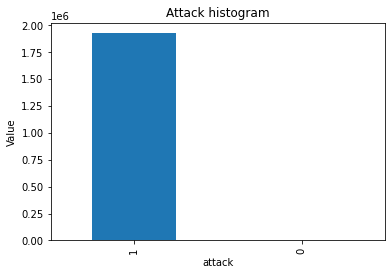

In [0]:
pd.value_counts(df['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack'].value_counts()

 #### Here we can find that there is a lot of imbalance in the dataset, so we can tell the data is highly-imballanced. Thus we need to synthtically oversample the minority class to get a balanced dataset for training and testing.

## Defining some methods which are later used:

In [0]:
# Used to plot the roc curve.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))


  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)

# Used for splitting and normalizing dataset.
def test_scale():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

### Here, we are applying SMOTE method, and applying it to dataset. We use the daataset by applying attack packets to X and normal to Y and oversample Y sythetically to length of X

In [0]:
X = df.iloc[:, df.columns != 'attack']
y = df.iloc[:, df.columns == 'attack']
X, y = SMOTE().fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression:


In [0]:

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


Confusion matrix:
 [[753354  18220]
 [147195 622531]]


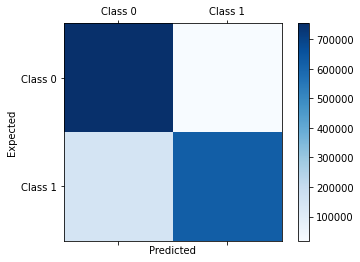

Accuracy 0.8926782586128593
              precision    recall  f1-score   support

           0       0.84      0.98      0.90    771574
           1       0.97      0.81      0.88    769726

    accuracy                           0.89   1541300
   macro avg       0.90      0.89      0.89   1541300
weighted avg       0.90      0.89      0.89   1541300

AUC Score: 
0.8925777736464021


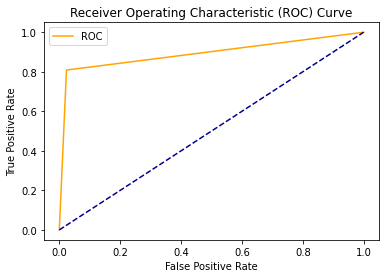

In [0]:
classif_results()

# Decision Trees

In [0]:
test_scale()

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)



Confusion matrix:
 [[771563     11]
 [ 34080 735646]]


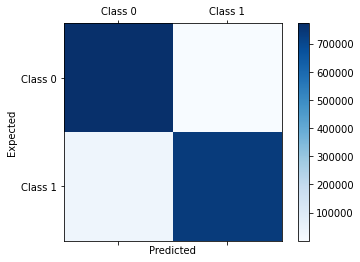

Accuracy 0.977881658340362
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    771574
           1       1.00      0.96      0.98    769726

    accuracy                           0.98   1541300
   macro avg       0.98      0.98      0.98   1541300
weighted avg       0.98      0.98      0.98   1541300

AUC Score: 
0.9778551239961651


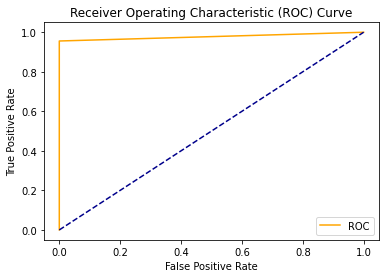

In [0]:
classif_results()

# Random Forest:

In [0]:


test_scale()

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)



Confusion matrix:
 [[771567      7]
 [ 33836 735890]]


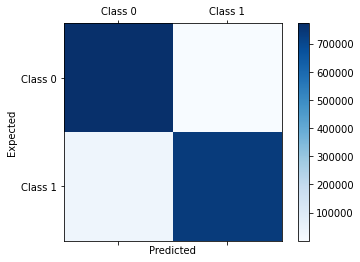

Accuracy 0.9780425614740803
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    771574
           1       1.00      0.96      0.98    769726

    accuracy                           0.98   1541300
   macro avg       0.98      0.98      0.98   1541300
weighted avg       0.98      0.98      0.98   1541300

AUC Score: 
0.978016214059112


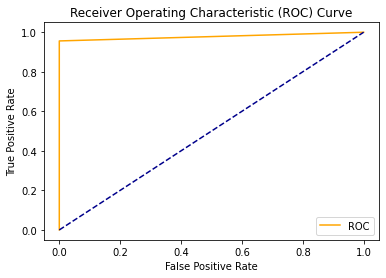

In [0]:
classif_results()

# KNN

In [0]:
test_scale()


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[771526     48]
 [ 33964 735762]]


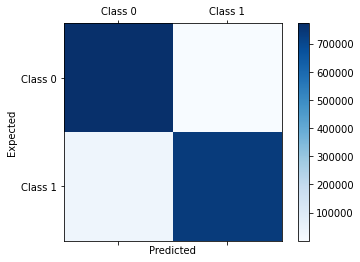

Accuracy 0.9779329137740869
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    771574
           1       1.00      0.96      0.98    769726

    accuracy                           0.98   1541300
   macro avg       0.98      0.98      0.98   1541300
weighted avg       0.98      0.98      0.98   1541300

AUC Score: 
0.9779064985234964


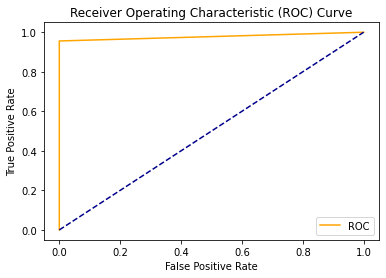

In [0]:
classif_results()

# Support Vector Machines:

In [0]:
test_scale()

# Fitting SVM to the Training set
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

classifier = SVC()

classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[754603  16971]
 [147757 621969]]


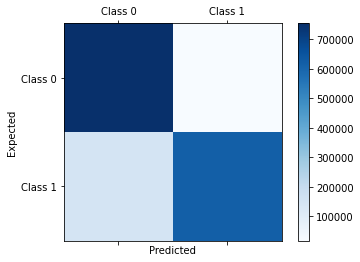

Accuracy 0.8931239862453773
              precision    recall  f1-score   support

           0       0.84      0.98      0.90    771574
           1       0.97      0.81      0.88    769726

    accuracy                           0.89   1541300
   macro avg       0.90      0.89      0.89   1541300
weighted avg       0.90      0.89      0.89   1541300

AUC Score: 
0.8930220931283096


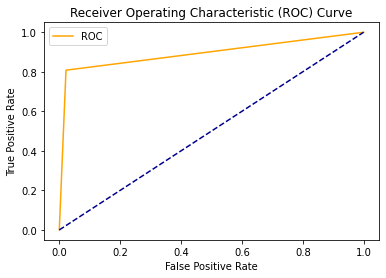

In [0]:


classif_results()

# Naive Bayes Classifier

In [0]:
test_scale()

# Fitting SVM to the Training set
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
classifier = GaussianNB()

# Train the model using the training sets
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[106236 665338]
 [  3371 766355]]


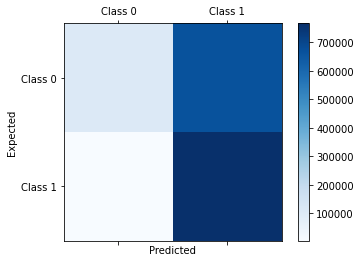

Accuracy 0.5661396223966781
              precision    recall  f1-score   support

           0       0.97      0.14      0.24    771574
           1       0.54      1.00      0.70    769726

    accuracy                           0.57   1541300
   macro avg       0.75      0.57      0.47   1541300
weighted avg       0.75      0.57      0.47   1541300

AUC Score: 
0.5666539481112982


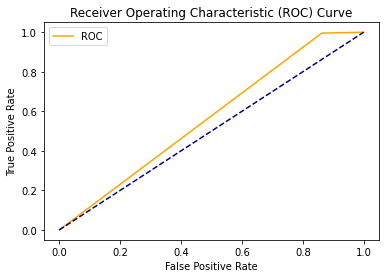

In [0]:
classif_results()

# Neural Network

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 3)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


Epoch 1/3
2311948/2311948 [==============================] - 260s 113us/step - loss: 0.2312 - accuracy: 0.9180
Epoch 2/3
2311948/2311948 [==============================] - 264s 114us/step - loss: 0.2177 - accuracy: 0.9243
Epoch 3/3
2311948/2311948 [==============================] - 261s 113us/step - loss: 0.2155 - accuracy: 0.9250


Confusion matrix:
 [[748417  23157]
 [ 90857 678869]]


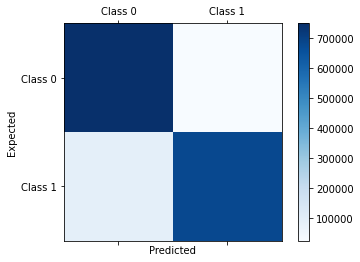

Accuracy 0.9260273794848505
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    771574
           1       0.97      0.88      0.92    769726

    accuracy                           0.93   1541300
   macro avg       0.93      0.93      0.93   1541300
weighted avg       0.93      0.93      0.93   1541300

AUC Score: 
0.9259746087725486


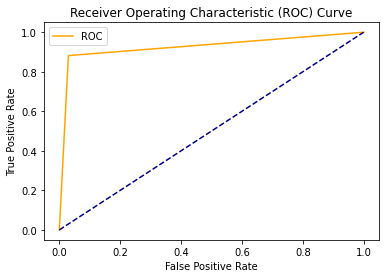

In [0]:
classif_results()